# Occasion Classfier using Guest Count Bins and Heuristics

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [3]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
sys.path.append(module_path+"/heuristics")

In [26]:
module_path

'/Users/danielastepanov/Documents/Bar-Ilan/b_semester18/DS_project/BeerW-BigData-Project'

In [4]:
from occasion_classifier import shrink_orders_to_table
from occasion_classifier import classify

In [5]:
hockey = pd.read_csv("../data/hockey_3_text_processed.csv")
silvester = pd.read_csv("../data/silvester_3_text_processed.csv")
valentine = pd.read_csv("../data/valentine_3_text_processed.csv")
hockey = hockey[~(hockey.guest_count == 0)]
silvester = silvester[~(silvester.guest_count == 0)]
valentine = valentine[~(valentine.guest_count == 0)]
data = pd.concat([hockey, silvester, valentine], axis=0)

## Using clean data (pre-processed) and bars we deemed trsutworthy, we use the Guest_Count feature to divide our orders into the following bins:

### Bins:
### - 1
### - 2
### - 3-5
### - 6+

## For each bin, we describe the chosen occasions

## Common Occasions to all bins:
* **BREAKFAST**
* **LUNCH**
* **DINNER**
* **DRINKING**
* **UNKNOWN**

### Category 1:
*In addition to the common occasions*
1. **MUNCH** - time of day must be `late_night`, contains only meals that are not large
2. **CASUAL DRINK** - any time of day, ratio of food to drinks less than 1.5. up to 3 drinks can have <=1.2 L of beer volume.
3. **NOT_1** - either too many items ordered in a single step, or "kid" in one of the titles.

### Category 2:
*In addition to the common occasions*
1. **ROMANTIC_DATE**
2. **FANCY_DATE**
3. **MALES_ONLY**
4. **JUST_EATING**
5. **BIRTHDAY**
6. **KIDS**
7. **NOT_2**

### Category 3-5:
1. **FAMILY EVENT**
2. **SOCIAL GATHERING**
3. **AFTER WORK**

### Category 6:
##### party events occurs if the guest count is larger than 10
1. **FAMILY EVENT**
3. **SOCIAL GATHERING**
4. **AFTER WORK**

------------------------------------------

## We annotated ~50 tables for dev, and 25 for test, for each category bin.


# DEV results

In [6]:
import csv

results = {}
total_correct = 0
total_incorrect = 0
with open("../heuristics/dev.csv") as f:
    csv_reader = csv.reader(f, delimiter=',')
    current_cat = 0
    table_results = {}
    for row in csv_reader:
        if len(row) == 1:
            current_cat = row[0]
            results[current_cat] = {}
            table_results[current_cat] = []
            results[current_cat]["correct"] = 0
            results[current_cat]["incorrect"] = 0
            continue
            
        orders = data[data.order_id == int(row[0])]
        table = shrink_orders_to_table(orders)
        pred_occasion = classify(table)
        table_results[current_cat].append((int(row[0]), row[1], pred_occasion))
        if pred_occasion == row[1]:
            results[current_cat]["correct"] += 1
            total_correct += 1
        else:
            results[current_cat]["incorrect"] += 1
            total_incorrect += 1


# Accumulative Accuracy for all guest count bins for all occasions:


In [6]:
total_correct/(total_incorrect + total_correct)*100

85.0

## Accuracy for Category 1

In [7]:
results['1']["correct"]/(results['1']["correct"] + results['1']["incorrect"])

0.9215686274509803

## Accuracy for Category 3-5

In [8]:
results['3-5']["correct"]/(results['3-5']["correct"] + results['3-5']["incorrect"])

0.85

## Accuracy for Category 6

In [9]:
results['6']["correct"]/(results['6']["correct"] + results['6']["incorrect"])

0.8571428571428571

----------------------------------------------

# TEST Results

In [7]:
import csv

results = {}
total_correct = 0
total_incorrect = 0
with open("../heuristics/test.csv") as f:
    csv_reader = csv.reader(f, delimiter=',')
    current_cat = 0
    table_results = {}
    for row in csv_reader:
        if len(row) == 1:
            current_cat = row[0]
            results[current_cat] = {}
            table_results[current_cat] = []
            results[current_cat]["correct"] = 0
            results[current_cat]["incorrect"] = 0
            continue
            
        orders = data[data.order_id == int(row[0])]
        table = shrink_orders_to_table(orders)
        pred_occasion = classify(table)
        table_results[current_cat].append((int(row[0]), row[1], pred_occasion))
        if pred_occasion == row[1]:
            results[current_cat]["correct"] += 1
            total_correct += 1
        else:
            results[current_cat]["incorrect"] += 1
            total_incorrect += 1


# Accumulative TEST Accuracy for all guest count bins for all occasions:


In [11]:
total_correct/(total_incorrect + total_correct)*100

82.55813953488372

## Accuracy for Category 1

In [12]:
results['1']["correct"]/(results['1']["correct"] + results['1']["incorrect"])

0.7916666666666666

## Accuracy for Category 3-5

In [13]:
results['3-5']["correct"]/(results['3-5']["correct"] + results['3-5']["incorrect"])

0.8666666666666667

## Accuracy for Category 6

In [14]:
results['6']["correct"]/(results['6']["correct"] + results['6']["incorrect"])

0.8125

## Accuracies for test are 80 and above. To really be trustworthy of these numbers, a much larger test set should be collected.

------------------------------------

## Lets try our classifiers on each dataset

# Hockey

In [ ]:
'''
hockey_ids = list(hockey.order_id.value_counts().keys())
results = {}
current_cat = 0
hockey_results = []
hockey_tables = shrink_orders_to_table(hockey)
for order in hockey_ids:
    table = hockey_tables[hockey_tables.index == order]
    pred_occasion = classify(table)
    hockey_results.append((order, table.guest_count.iloc[0], pred_occasion))
hockey_results = pd.DataFrame(hockey_results, columns=["order_id", "guest_count", "occasion"])
hockey_results.to_csv("hockey_occasions.csv", index=False)
'''

In [7]:
hockey_occasions = pd.read_csv("hockey_occasions.csv")

# Valentine

In [ ]:
'''
valentine_ids = list(valentine.order_id.value_counts().keys())
results = {}
current_cat = 0
val_results = []
valentine_tables = shrink_orders_to_table(valentine)
for order in valentine_ids:
    table = valentine_tables[valentine_tables.index == order]
    pred_occasion = classify(table)
    val_results.append((order, table.guest_count.iloc[0], pred_occasion))
val_results = pd.DataFrame(val_results, columns=["order_id", "guest_count", "occasion"])
val_results.to_csv("valentine_occasions.csv", index=False)
'''

In [8]:
valentine_occasions = pd.read_csv("valentine_occasions.csv")

# Silvester

In [ ]:
'''
silvester_ids = list(silvester.order_id.value_counts().keys())
results = {}
current_cat = 0
sil_results = []
sil_tables = shrink_orders_to_table(silvester)
for order in silvester_ids:
    table = sil_tables[sil_tables.index == order]
    pred_occasion = classify(table)
    sil_results.append((order, table.guest_count.iloc[0], pred_occasion))
sil_results = pd.DataFrame(sil_results, columns=["order_id", "guest_count", "occasion"])
sil_results.to_csv("silvester_occasions.csv", index=False)
'''

In [9]:
silvester_occasions = pd.read_csv("silvester_occasions.csv")

# Guest count distributions

In [10]:
bins = ['1', '2', '3-5', '6+']

### Hockey

In [11]:
hock_dfs = {
    '1'   : hockey[hockey.guest_count == 1],
    '2'   : hockey[hockey.guest_count == 2],
    '3-5' : hockey[(hockey.guest_count >= 3) & (hockey.guest_count <= 5)],
    '6+'  : hockey[hockey.guest_count >= 6]
}
for bin in bins:
    print("Total number of entries for bin {}: {} ({}%)".format(bin, len(hock_dfs[bin]), round(100 * len(hock_dfs[bin]) / len(hockey), 2)))

Total number of entries for bin 1: 156812 (36.51%)
Total number of entries for bin 2: 122157 (28.44%)
Total number of entries for bin 3-5: 109980 (25.61%)
Total number of entries for bin 6+: 40549 (9.44%)


### Valentine

In [12]:
val_dfs = {
    '1'   : valentine[valentine.guest_count == 1],
    '2'   : valentine[valentine.guest_count == 2],
    '3-5' : valentine[(valentine.guest_count >= 3) & (valentine.guest_count <= 5)],
    '6+'  : valentine[valentine.guest_count >= 6]
}
for bin in bins:
    print("Total number of entries for bin {}: {} ({}%)".format(bin, len(val_dfs[bin]), round(100 * len(val_dfs[bin]) / len(valentine), 2)))

Total number of entries for bin 1: 46896 (30.8%)
Total number of entries for bin 2: 53640 (35.23%)
Total number of entries for bin 3-5: 40068 (26.32%)
Total number of entries for bin 6+: 11649 (7.65%)


### Silvester

In [13]:
sil_dfs = {
    '1'   : silvester[silvester.guest_count == 1],
    '2'   : silvester[silvester.guest_count == 2],
    '3-5' : silvester[(silvester.guest_count >= 3) & (silvester.guest_count <= 5)],
    '6+'  : silvester[silvester.guest_count >= 6]
}
for bin in bins:
    print("Total number of entries for bin {}: {} ({}%)".format(bin, len(sil_dfs[bin]), round(100 * len(sil_dfs[bin]) / len(silvester), 2)))

Total number of entries for bin 1: 111215 (28.72%)
Total number of entries for bin 2: 112265 (28.99%)
Total number of entries for bin 3-5: 125843 (32.5%)
Total number of entries for bin 6+: 37901 (9.79%)


# Occasions Distribution

In [14]:
hockey_occasions.occasion.value_counts(normalize=True)[:10]

DINNER              0.233938
LUNCH               0.155577
CASUAL_DRINK        0.139844
UNK                 0.115337
DRINKING            0.105792
NOT_1               0.056064
JUST_EATING         0.040909
FAMILY_EVENT        0.039708
SOCIAL_GATHERING    0.018386
FANCY_DATE          0.017842
Name: occasion, dtype: float64

In [15]:
valentine_occasions.occasion.value_counts(normalize=True)[:10]

DINNER           0.254444
LUNCH            0.165496
UNK              0.113331
CASUAL_DRINK     0.104685
DRINKING         0.088431
JUST_EATING      0.052877
NOT_1            0.052262
FAMILY_EVENT     0.043681
FANCY_DATE       0.027232
ROMANTIC_DATE    0.020432
Name: occasion, dtype: float64

In [16]:
silvester_occasions.occasion.value_counts(normalize=True)[:10]

DINNER              0.250042
LUNCH               0.147219
UNK                 0.113357
CASUAL_DRINK        0.098525
DRINKING            0.081767
FAMILY_EVENT        0.071732
NOT_1               0.060379
JUST_EATING         0.054987
FANCY_DATE          0.024839
SOCIAL_GATHERING    0.020376
Name: occasion, dtype: float64

### The distributiosn are quite similar, although a few notable differences. Casual drink appears 13% of the time under hockey, while its at 10 and 9 % in valentine and silvester.

### Family event also appears at 7% under silvester, while remains at a 4 and 3% in hockey and valentine.

### Dinner and lunch are the top two categories for all datasets.


# Lets first look at the differences between our bins

In [17]:
dfs = {
    '1'   : data[data.guest_count == 1],
    '2'   : data[data.guest_count == 2],
    '3-5' : data[(data.guest_count >= 3) & (data.guest_count <= 5)],
    '6+'  : data[data.guest_count >= 6]
}

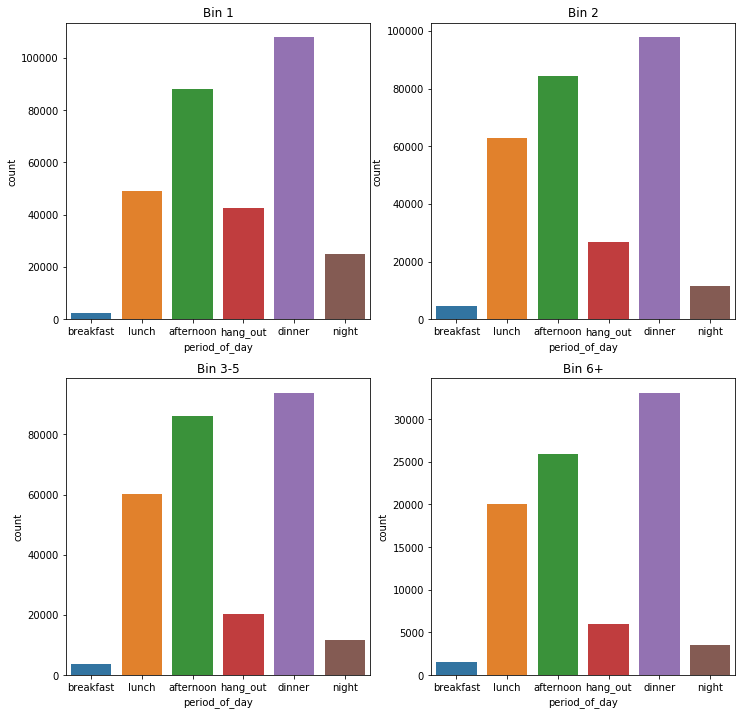

In [18]:
plt.rcParams['figure.figsize'] = [12, 12]

order = ['breakfast', 'lunch', 'afternoon', 'hang_out', 'dinner', 'night']

fig, axes = plt.subplots(2, 2)
axes = axes.flatten()

for i in range(len(bins)):
    bin = bins[i]
    sns.countplot(x='period_of_day', data=dfs[bin], order=order, ax=axes[i])
    axes[i].title.set_text('Bin ' + bin)

#### Overall it seems that bin 1 goes out to eat more around hand_gout and night time than the other bins, while eating out at lunch less than the rest of the bins.
#### Most of the other bins show similar treands for the other times of the day.


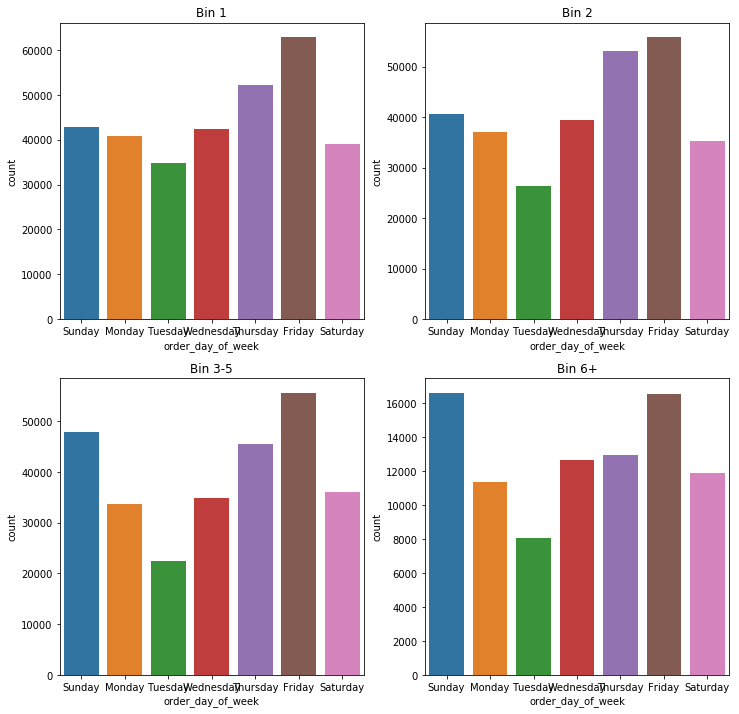

In [23]:
fig, axes = plt.subplots(2, 2)
axes = axes.flatten()
order = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']

for i in range(len(bins)):
    bin = bins[i]
    sns.countplot(x='order_day_of_week', data=dfs[bin], order=order,ax=axes[i])
    axes[i].title.set_text('Bin ' + bin)

#### Unsurprisingly, it seems like the big groups hangout more on sundays and fridays, whereas for bings 1 & 2 the more common days are thursdays and fridays.
#### for bin 1 it seems that almost all days other than friday and thursday are pretty evenly spread out.

## Lets look at a few Occasions

# Drinking

In [27]:
occasions = pd.concat([hockey_occasions, valentine_occasions, silvester_occasions],axis=0)
drinking_occ = occasions[occasions.occasion == "DRINKING"]
drinking = data[data.order_id.isin(drinking_occ.order_id)]

In [32]:
drink_dfs = {
    '1'   : drinking[drinking.guest_count == 1],
    '2'   : drinking[drinking.guest_count == 2],
    '3-5' : drinking[(drinking.guest_count >= 3) & (drinking.guest_count <= 5)],
    '6+'  : drinking[drinking.guest_count >= 6]
}

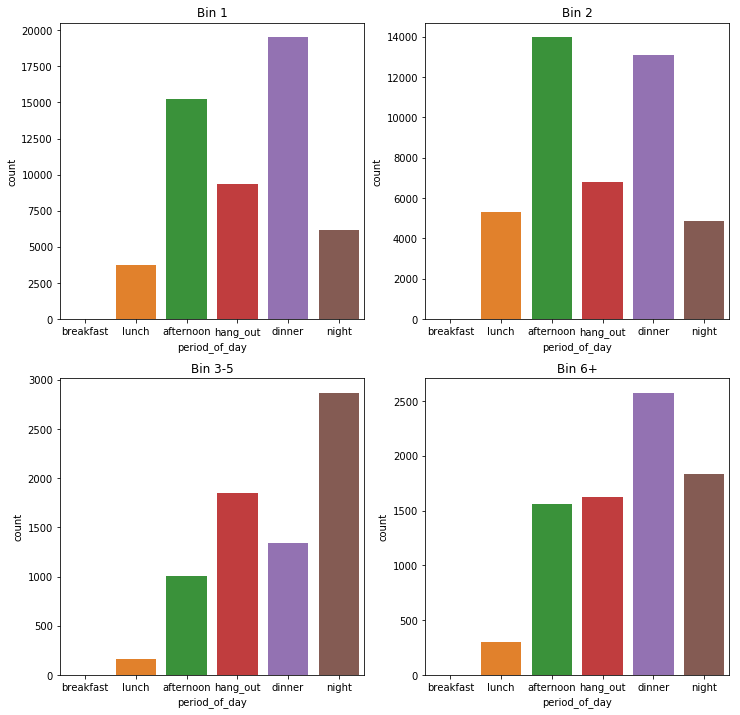

In [33]:
plt.rcParams['figure.figsize'] = [12, 12]

order = ['breakfast', 'lunch', 'afternoon', 'hang_out', 'dinner', 'night']

fig, axes = plt.subplots(2, 2)
axes = axes.flatten()

for i in range(len(bins)):
    bin = bins[i]
    sns.countplot(x='period_of_day', data=drink_dfs[bin], order=order, ax=axes[i])
    axes[i].title.set_text('Bin ' + bin)

#### Looks like drinking times differ a bit between our bins. in the 3-5, we have "night" time as the most common tiem for drinking, while groups 6+ is dinner time.

#### While bins 1 & 2 are more similar in their drinking times, afternoon and dinner are most common.

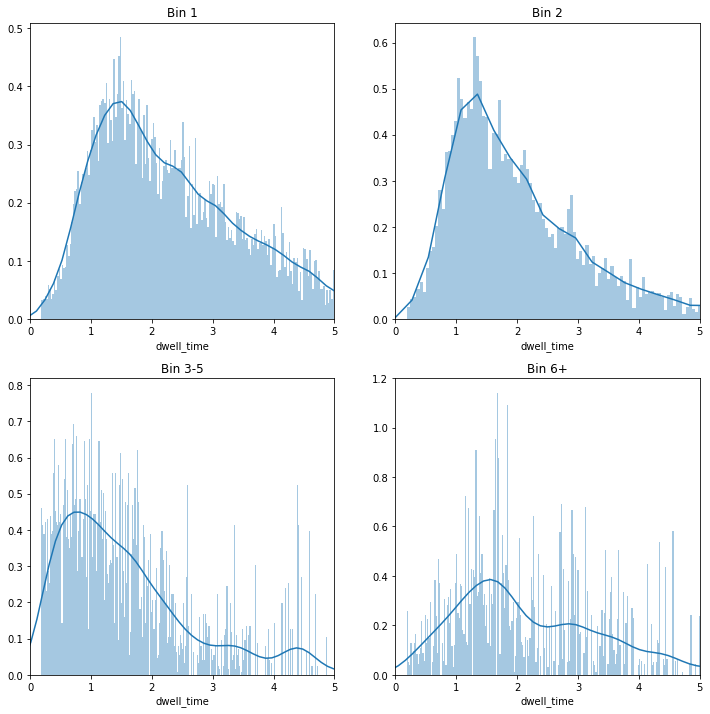

In [35]:
fig, axes = plt.subplots(2, 2)
axes = axes.flatten()

for i in range(len(bins)):
    bin = bins[i]
    sns.distplot(drink_dfs[bin]['dwell_time'], bins=500, ax=axes[i])
    axes[i].title.set_text('Bin ' + bin)
    axes[i].set_xlim(0, 5)

In [41]:
drinking.describe()

,bar_id,order_id,order_item_id,item_qty,sales_before_tax,sales_inc_tax,guest_count,category_id,beer_brand_id,beer_serving_type_id,...,first_to_second_order,avg_time_between_steps,sit_to_order,max_items_per_step,total_large_meals,total_small_meals,total_large_sharable_meals,total_small_sharable_meals,total_sales_before_tax,total_sales_inc_tax
count,113303.000000,1.133030e+05,1.133030e+05,113303.000000,113303.000000,113303.000000,113303.000000,113303.000000,113303.000000,113303.000000,...,113303.000000,113303.000000,113303.000000,113303.000000,113303.000000,113303.000000,113303.000000,113303.000000,113303.000000,113303.000000
mean,11051.547055,4.546713e+08,3.473019e+10,1.086739,9.259185,10.463888,1.993451,2.281113,205.764516,0.603567,...,7.658615,19.641262,4.871495,3.387845,1.017571,0.441844,0.392496,0.151673,86.482172,97.783186
std,7751.365185,7.155878e+07,2.181880e+10,0.729913,7.102405,8.035485,1.638385,1.196768,932.608035,0.898350,...,20.805372,18.055960,20.216292,3.149674,1.436449,1.067943,0.815295,0.517642,86.680131,98.361434
min,1154.000000,3.587425e+08,4.461098e+09,-6.000000,-17.990000,-20.327684,1.000000,1.000000,0.000000,0.000000,...,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,3.250000,3.250000
25%,1279.000000,3.624584e+08,4.487970e+09,1.000000,6.000000,6.780488,1.000000,1.000000,0.000000,0.000000,...,0.000000,11.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,42.250000,47.690000
50%,17125.000000,5.113919e+08,5.113919e+10,1.000000,7.500000,8.475600,2.000000,2.000000,0.000000,0.000000,...,0.000000,16.500000,1.000000,3.000000,1.000000,0.000000,0.000000,0.000000,64.630000,73.060000
75%,17650.000000,5.209622e+08,5.209622e+10,1.000000,11.500000,12.995364,2.000000,3.000000,71.000000,2.000000,...,8.000000,24.200000,1.000000,4.000000,2.000000,0.000000,1.000000,0.000000,97.720000,110.410000
max,19513.000000,5.264150e+08,5.264150e+10,121.700000,697.000000,787.624658,10.000000,6.000000,27975.000000,3.000000,...,1292.000000,710.500000,533.000000,61.000000,32.000000,14.000000,9.000000,5.000000,966.050000,1114.247238


In [48]:
drinking.category_id.value_counts(normalize=True)

3.0    0.406777
1.0    0.339047
2.0    0.190092
6.0    0.041517
4.0    0.020388
5.0    0.002180
Name: category_id, dtype: float64

### as we'd expect, there'd be more drinks in the drinking category, especially more liquers

In [46]:
drinking['total_orders_category_id_1.0'].value_counts(normalize=True)[:10]

0.0     0.321315
4.0     0.131541
2.0     0.104702
3.0     0.092919
1.0     0.091692
5.0     0.067474
6.0     0.055091
7.0     0.028516
8.0     0.023018
9.0     0.014827
10.0    0.012180
Name: total_orders_category_id_1.0, dtype: float64

In [47]:
drinking['total_orders_category_id_3.0'].value_counts(normalize=True)[:10]

0.0     0.273479
2.0     0.121356
4.0     0.103254
3.0     0.100748
1.0     0.063114
5.0     0.052699
6.0     0.052187
8.0     0.029426
7.0     0.027316
9.0     0.017237
10.0    0.015039
Name: total_orders_category_id_3.0, dtype: float64

### These numbers make sense, since we defined our rules as less drinks but liquers affect the same as more drinks but being beers. Therefore category one having most quantity of 4 beers, while liquers having most quantity of 2s make sense.

In [54]:
for bin in bins:
    print("Most common beers for bin # ", bin)
    print(drink_dfs[bin][drink_dfs[bin].category_id == 1].title.value_counts(normalize=True)[:10])
    print()

Most common beers for bin #  1
budweiser tap      0.061497
light              0.055668
corona             0.048396
mill st org tap    0.028984
pnt budweiser      0.026684
stella.pt          0.025134
keiths tap         0.017112
dark               0.016524
coors.light.xl     0.016524
bud light tap      0.015882
Name: title, dtype: float64

Most common beers for bin #  2
budweiser tap      0.067449
corona             0.056834
light              0.053867
stella.pt          0.040087
mill st org tap    0.035670
keiths tap         0.024131
coors.light.xl     0.021956
dark               0.021428
goose ipa tap      0.020967
bud light tap      0.020835
Name: title, dtype: float64

Most common beers for bin #  3-5
corona             0.158084
budweiser tap      0.119464
mill st org tap    0.067456
bud light tap      0.041195
keiths tap         0.040680
keiths  tap        0.032441
west coast ipa     0.031926
shock top tap      0.031926
goose ipa tap      0.031411
light              0.021627
Name: t